<a href="https://colab.research.google.com/github/kiteomoru/demo-repo/blob/main/Prostate_Ca_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Poject Authors: Okiemute Omoru,  Sylvia Robertson, Shesha Simhachalam (IUPUI, BIOINFORMATICS)

In [ ]:

prostateca_df = pd.read_csv('/content/Prostate_Cancer.csv')
prostateca_df.head()


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
prostateca_df.info() #data explore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [ ]:
prostateca_df.columns  #data explore

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [ ]:
prostateca_df.head()  #data explore

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
prostateca_df['diagnosis_result'].replace({'M':0,'B':1},inplace=True)

In [ ]:
prostateca_df.head()  #data explore

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,0,23,12,151,954,0.143,0.278,0.242,0.079
1,2,1,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,0,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,0,14,16,78,386,0.070,0.284,0.260,0.097
4,5,0,9,19,135,1297,0.141,0.133,0.181,0.059


In [ ]:
{'unique patients':len(prostateca_df.id.unique()), 'records':len(prostateca_df.id)}

{'records': 100, 'unique patients': 100}

In [ ]:
prostateca_df.diagnosis_result.value_counts()

0    62
1    38
Name: diagnosis_result, dtype: int64

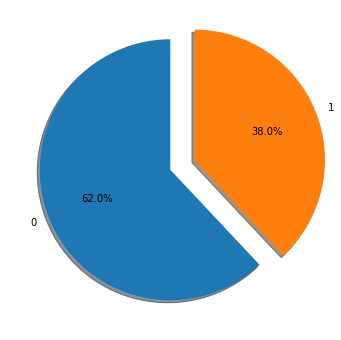

In [ ]:
data_dr = prostateca_df['diagnosis_result'].value_counts()

label = [data_dr.index.tolist()]
plt.pie(data_dr, labels=label[0], shadow=True, explode=(0.0, 0.2), autopct='%1.1f%%', startangle=90)
plt.gcf().set_size_inches(12,6)
plt.show()

In [ ]:
#split to train and test

X_train, X_test, y_train, y_test=train_test_split(
    prostateca_df.drop(['id','diagnosis_result'], axis=1),
    prostateca_df[['diagnosis_result']],
    test_size=0.3,
    random_state=41)

In [ ]:
X_train.shape

(70, 8)

In [ ]:

#removing outliers
for column in X_train.columns:
    
    df_train1 = X_train[(y_train.diagnosis_result==0) & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result==0,column])+3*np.std(X_train.loc[y_train.diagnosis_result==0,column]))]
    df_test1 = X_test[(y_test.diagnosis_result==0) & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result==0,column])+3*np.std(X_train.loc[y_train.diagnosis_result==0,column]))]
    
    label_train1 = y_train[(y_train.diagnosis_result==0) & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result==0,column])+3*np.std(X_train.loc[y_train.diagnosis_result==0,column]))]
    label_test1 = y_test[(y_test.diagnosis_result==0) & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result==0,column])+3*np.std(X_train.loc[y_train.diagnosis_result==0,column]))]
    
    df_train2 = X_train[(y_train.diagnosis_result==1) & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result==1,column])+3*np.std(X_train.loc[y_train.diagnosis_result==1,column]))]
    df_test2 = X_test[(y_test.diagnosis_result==1) & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result==1,column])+3*np.std(X_train.loc[y_train.diagnosis_result==1,column]))]
    
    label_train2 = y_train[(y_train.diagnosis_result==1) & (X_train[column]<np.mean(X_train.loc[y_train.diagnosis_result==1,column])+3*np.std(X_train.loc[y_train.diagnosis_result==1,column]))]
    label_test2 = y_test[(y_test.diagnosis_result==1) & (X_test[column]<np.mean(X_train.loc[y_train.diagnosis_result==1,column])+3*np.std(X_train.loc[y_train.diagnosis_result==1,column]))]  

In [ ]:
X_train=pd.concat([df_train1,df_train2])
y_train=pd.concat([label_train1,label_train2])

X_test=pd.concat([df_test1,df_test2])
y_test=pd.concat([label_test1,label_test2])

X_train.shape

(68, 8)

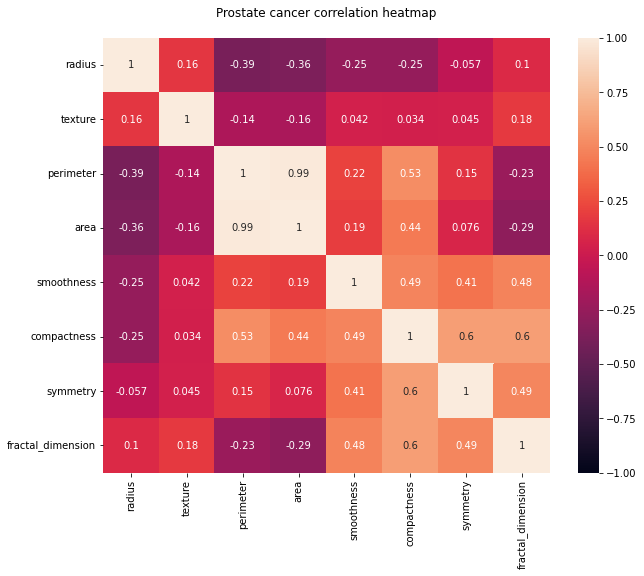

In [ ]:

corr = X_train.corr()
plt.figure(figsize=(10, 8))
plt.title('Prostate cancer correlation heatmap\n')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

In [ ]:
#remove highly correlated feature
correlated_features = set()
for i in range(len(corr .columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.7:
            colname = corr.columns[i]
            correlated_features.add(colname)
print(correlated_features)

{'area'}


In [ ]:
#drop "area"
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

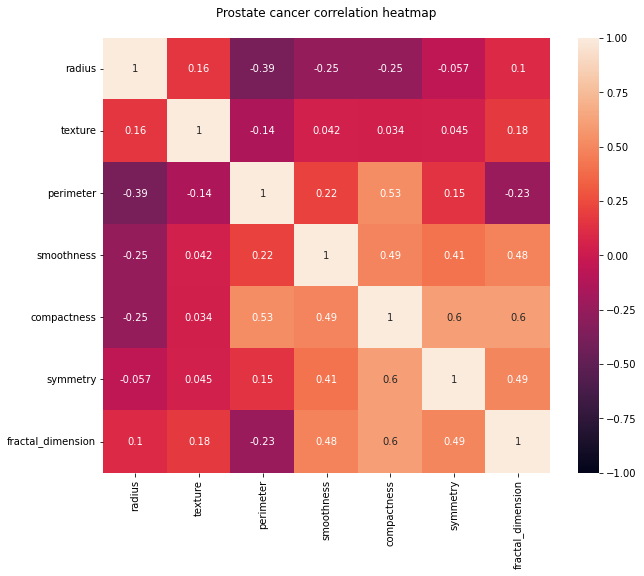

In [ ]:
corr = X_train.corr()
plt.figure(figsize=(10, 8))
plt.title('Prostate cancer correlation heatmap\n')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1);

In [ ]:
#remove features with '0' variance
constant_filter = VarianceThreshold(threshold=0.0)
constant_filter.fit(X_train)
X_train = constant_filter.transform(X_train)
X_test = constant_filter.transform(X_test)

X_train.shape, X_test.shape

((68, 7), (30, 7))

In [ ]:
#scale data
mm_scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(mm_scaler.fit_transform(X_train))
X_test = pd.DataFrame(mm_scaler.transform(X_test))

In [ ]:
# Logistic Regression model

logreg = LogisticRegression(solver='liblinear',multi_class='ovr')
logreg.fit(X_train,y_train)
pred_log = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Confusion Matrix
y_pred = logreg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)


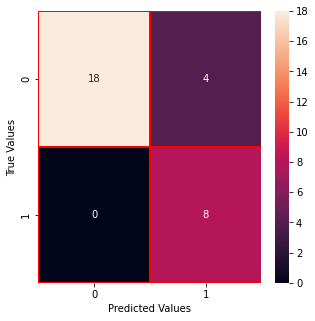

In [ ]:
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [ ]:

class_rep_log = classification_report(y_test, pred_log)
print("Logistic Regression: \n", class_rep_log)
print("Accuracy:",metrics.accuracy_score(y_test, pred_log))
print("Precision:",metrics.precision_score(y_test, pred_log))
print("Recall:",metrics.recall_score(y_test, pred_log))

Logistic Regression: 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.67      1.00      0.80         8

    accuracy                           0.87        30
   macro avg       0.83      0.91      0.85        30
weighted avg       0.91      0.87      0.87        30

Accuracy: 0.8666666666666667
Precision: 0.6666666666666666
Recall: 1.0


In [ ]:

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)
metrics.auc(fpr, tpr)


In [ ]:
#K-FOLD CROSS VALIDATION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
logreg.score(X_test, y_test)


0.8666666666666667

In [ ]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), prostateca_df.drop(['id','diagnosis_result'], axis=1),prostateca_df[['diagnosis_result']],cv=cv, scoring='accuracy',  n_jobs=-1)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.6 0.7 0.8 0.8 0.9 0.9 0.6 1.  0.9 0.6]
Avg : 0.78


In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(score_lr), std(score_lr)))

Accuracy: 0.780 (0.140)


In [ ]:
#SVM 
from sklearn import svm
#Set up classifier
clf = svm.SVC(kernel='linear',C=0.1,probability=True) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Accuracy, Precision, Recall SVM
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8666666666666667
Precision: 0.6666666666666666
Recall: 1.0


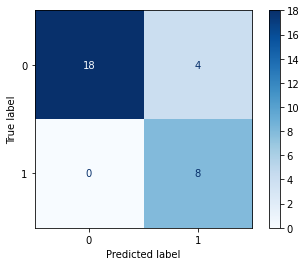

In [ ]:
#Confusion Matrix SVM
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        cmap=plt.cm.Blues
    )
plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


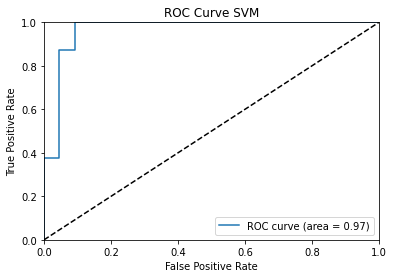

In [ ]:
#SVM ROC results
probas_ = clf.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SVM')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#K-Fold Cross Validation of SVM
scores=cross_val_score(clf, prostateca_df.drop(['id','diagnosis_result'], axis=1),prostateca_df[['diagnosis_result']],cv=cv, scoring='accuracy',  n_jobs=-1)
print(scores)
print("Avg :",np.average(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

[0.8 0.8 1.  0.9 0.9 0.9 0.7 1.  0.8 0.5]
Avg : 0.8300000000000001
Accuracy: 0.830 (0.142)


In [ ]:
#Feature Selection 
#SVM
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
model = svm.SVC(kernel='linear',C=0.1,probability=True) 
X=prostateca_df.drop(['id','diagnosis_result'], axis=1)
Y=prostateca_df[['diagnosis_result']]
rfe= RFE(estimator=model,n_features_to_select=4,step=1)
rfe.fit(X,Y)
rfe.ranking_

#best accuracy was achieved with 4 features
#The top 4 features are ranked radius, texture, perimeter, and compactness.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

array([1, 1, 1, 2, 5, 1, 3, 4])

In [ ]:
#Feature Selection Accuracy SVM
scores=cross_val_score(rfe,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
print("Avg :",np.average(scores))
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Avg : 0.85
Accuracy: 0.850 (0.120)


In [ ]:
#Logistic Regression Feature Selection
model=LogisticRegression()
rfe= RFE(estimator=model,n_features_to_select=6,step=1)
rfe.fit(X,Y)
rfe.ranking_
#best accuracy was achieved with 6 features
#The top features are ranked texture, perimeter, smoothness,compactness,symmetry, and fractal_dimension.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3, 1, 1, 2, 1, 1, 1, 1])

In [ ]:
#Feature Selection Accuracy LogReg
scores=cross_val_score(rfe,X,Y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.850 (0.128)
